In [56]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,auc
from matplotlib import pyplot as plt
import time 

import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('/Users/mahimasinghdeo/Desktop/AI_Homework2_ML/reviews.csv',delimiter = '|')

In [58]:
df['label'][df['label']=="positive"]=1
df['label'][df['label']=="negative"]=0

In [1]:
test_df = df[df.index % 5 == 4]
test_df = test_df.reset_index(drop = True)

In [2]:
train_df = df[df.index % 5 !=4]
train_df = train_df.reset_index(drop = True)

In [3]:
train_feature = np.array(train_df['text'])
train_label = np.array(train_df['label'])
train_label = train_label.astype('int')

In [62]:
test_feature = np.array(test_df['text'])
test_label = np.array(test_df['label'])
test_label = test_label.astype('int')

In [64]:
t0 = time.clock()

In [70]:
 pipeline = Pipeline([
     ('vectorizer',TfidfVectorizer()),
         ('classifer',LinearSVC(C=0.15,tol=1e-6)) 
])

In [72]:
pipeline.fit(train_feature,train_label)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=1e-06,
     verbose=0))])

In [32]:
joblib.dump(pipeline,'linearSVCsubmission.sav')

['linearSVCsubmission.sav']

In [33]:
pred = pipeline.predict(test_feature)

# Accuracy

In [34]:
accuracy = accuracy_score(test_label,pred)
accuracy

0.90470951529623567

# Precision and Recall

In [35]:
print(classification_report(test_label,pred,target_names=['negative','positive']))

             precision    recall  f1-score   support

   negative       0.91      0.90      0.90     39974
   positive       0.90      0.91      0.90     40013

avg / total       0.90      0.90      0.90     79987



# ROC Curve

In [36]:
#calculate ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label,pred)

In [37]:
#calculate area under ROC curve
area_under_roc = roc_auc_score(test_label,pred)
area_under_roc

0.9047086636228826

In [38]:
#calculate area under a curve given x coordinates and y coordinates
auc_ = auc(false_positive_rate, true_positive_rate)

In [39]:
#function to plot ROC AUC
def plot_auc(false_positive_rate, true_positive_rate,auc_):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% auc_)
    plt.legend(loc ='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

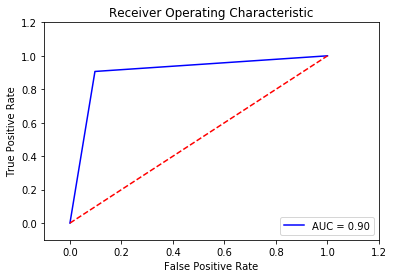

In [40]:
#call function to plot ROC AUC
plot_auc(false_positive_rate, true_positive_rate,auc_)

In [41]:
print(time.clock() - t0)

41.285650000000004
